# House Prices - advanced Regression Techniques
In this competition, I am going to implement a Decision Forest using `TensorFlow`. So, let's import the libraries.

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### Load the Database and Merge Train & Test Sets for Feature Engineering  

We first load the training and test datasets, then merge them into a single DataFrame to facilitate feature engineering. Since the test set does not contain `SalePrice`, we add it as a placeholder.  


In [88]:
df_1 = pd.read_csv("C:\\Users\\youss\\OneDrive\\Documents\\kaggle\\House Prices - advanced Regression Techniques\\train.csv")
df_2 = pd.read_csv("C:\\Users\\youss\\OneDrive\\Documents\\kaggle\\House Prices - advanced Regression Techniques\\test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)


In [89]:
print("Full train dataset shape is {}".format(df_1.shape))


Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 5 entries using the following code:

In [90]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Identifying Missing Values in the Dataset

To handle missing values effectively, we first set the `Id` column as the index and then identify columns that contain null values.

In [91]:
df = df.set_index('Id')
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index] 
print (df_null.shape)

(2919, 34)


### Visualizing Missing Values in the Dataset

To better understand the distribution of missing values, we first display the first few rows of the dataset containing null values. Then, we use a heatmap to visualize the missing data patterns.


In [92]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

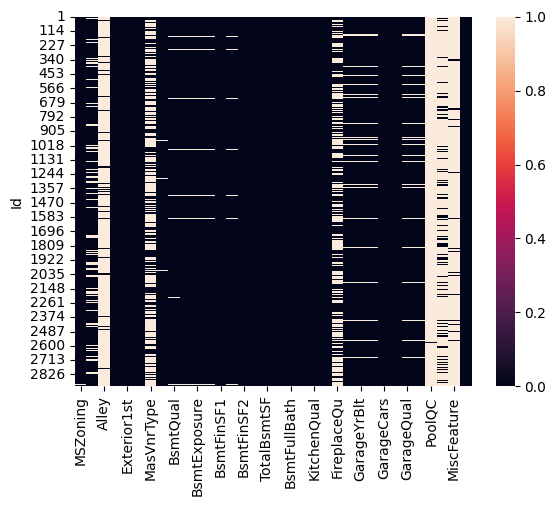

In [93]:
sns.heatmap(df_null.isnull())

### Handling Missing Values and Encoding Categorical Variables

To clean our dataset, we first identify columns with categorical (`object`) data. Then, we drop categorical columns that have more than **1,100 missing values**, as they may not provide useful information.

In [94]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

We handle missing values for categorical features (object types) and encode them using one-hot encoding.


In [95]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [96]:
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [97]:
df_objects['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
null          4
Name: count, dtype: int64

In [98]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


we drop the null-columns

In [99]:
for i in df_objects_encoded.columns:
    if 'null' in  i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [100]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [101]:
len(new_df.columns)

304

In [102]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [103]:
df_objects_encoded['MSZoning_C (all)'].value_counts()

MSZoning_C (all)
False    2894
True       25
Name: count, dtype: int64

In [104]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis=1 )

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [105]:
len(new_df.columns)

267

### Numerical data distribution
We will now take a look at how the `numerical features` are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [106]:
list(set(df.dtypes.tolist()))


[dtype('int64'), dtype('float64'), dtype('O')]

In [107]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.



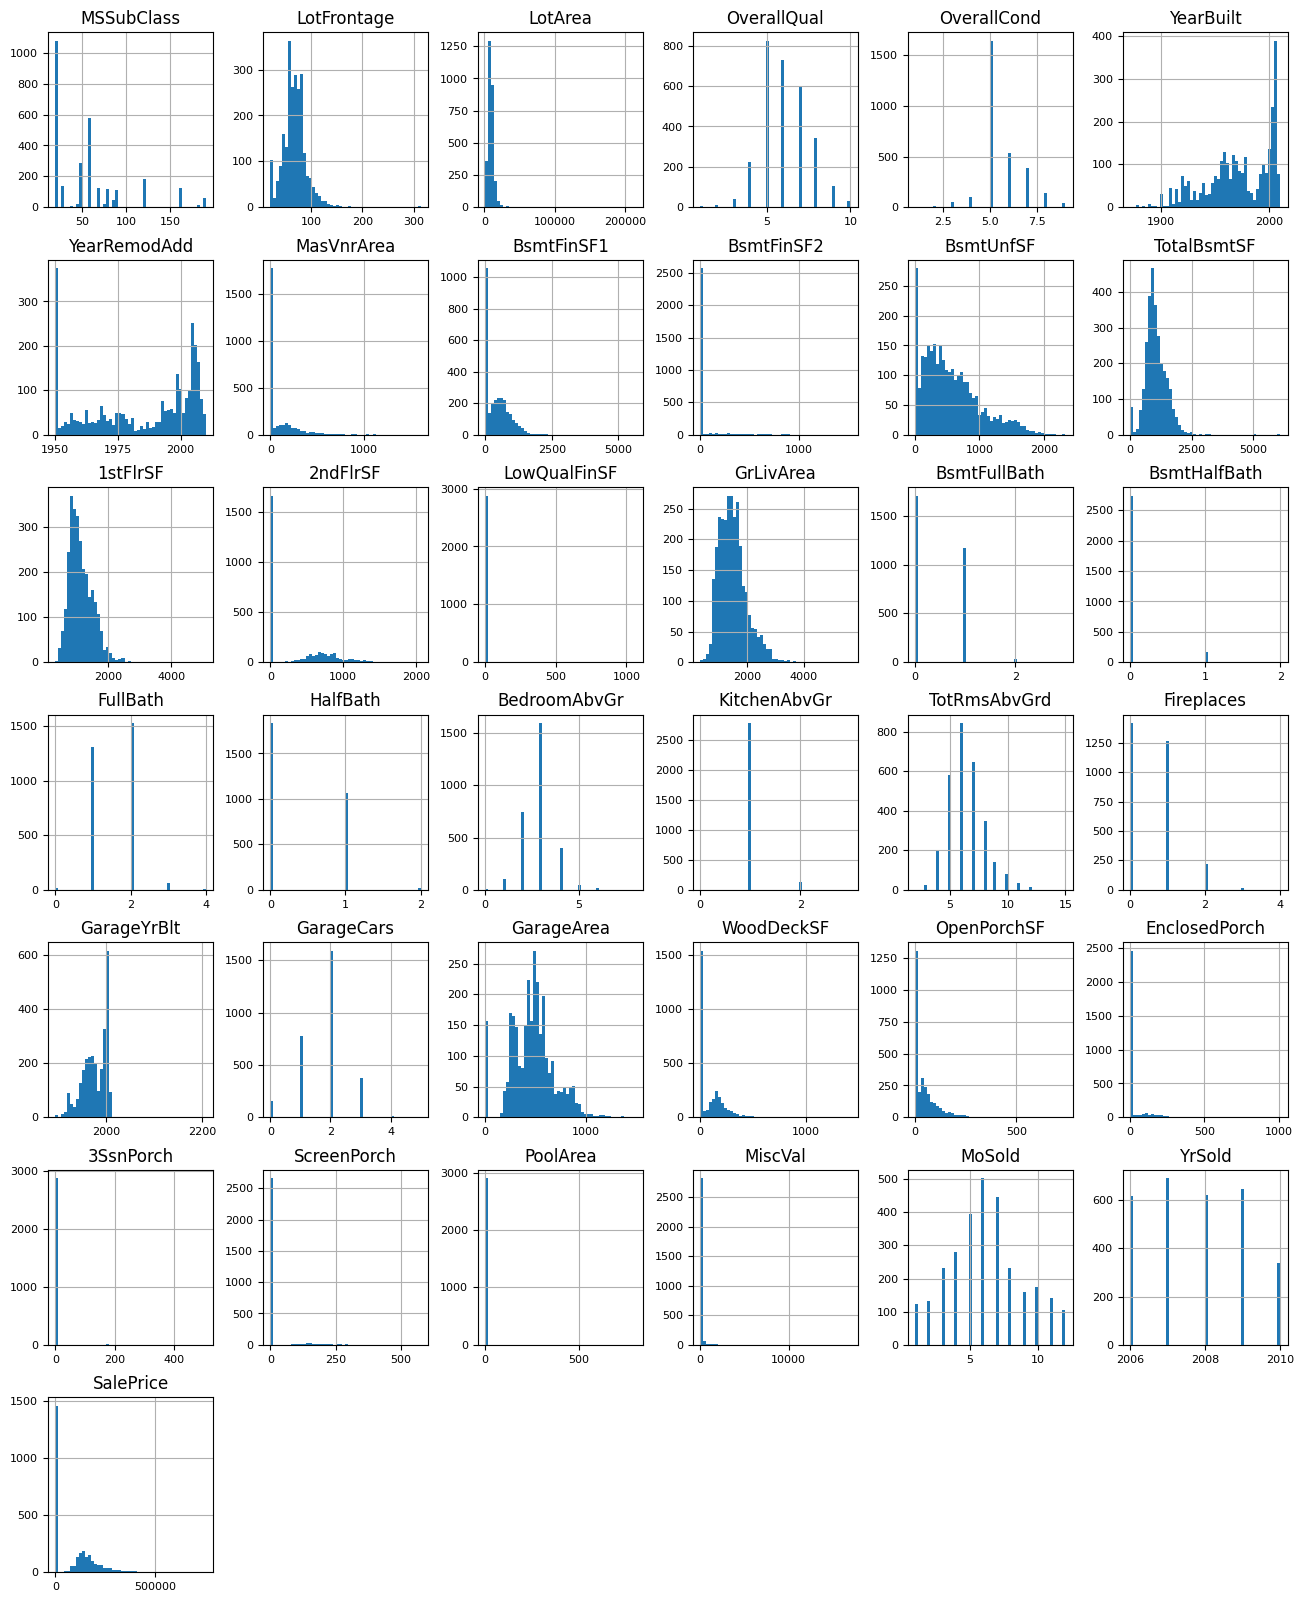

In [108]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [109]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'OverallQual', 'OverallCond', ]
Mean_columns = ['LotFrontage', 'MasVnrArea', 'MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MiscVal', 'MoSold'] 

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]


Series([], dtype: int64)

We have prepared our data; now let's split the dataset into training and testing sets, returning them to their original state.

In [110]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [111]:
len(new_df)

2919

## Select a model

To train and evaluate different regression models for house price prediction, we import necessary libraries for data splitting, error evaluation, and model training. 

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Now let us split the dataset into training and cross-validation datasets:

In [113]:
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_cv, Y_train, Y_cv = train_test_split(x, y, test_size=0.2, random_state=42)
Y_train = np.reshape(Y_train, (-1,1))
Y_cv = np.reshape(Y_cv, (-1,1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

### Linear Regression Model  

We train a **Linear Regression** model using the training data, make predictions on the test set, and evaluate its performance using **Mean Squared Error (MSE)**.  


In [114]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)
y_pred = model_1.predict(X_cv)
mean_squared_error(Y_cv, y_pred)


884420333.3164318

### XGBoost Regressor 

In [121]:
import xgboost, sklearn
print(xgboost.__version__, sklearn.__version__)

2.1.3 1.6.1


In [122]:
# Define the model
model_2 = XGBRegressor()

# Set up hyperparameters grid
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 6, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and model
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_cv)

# Evaluate performance
mse = mean_squared_error(Y_cv, y_pred)
print(f"Mean Squared Error: {mse}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

## Random Forest Regressor

In [49]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X_train, Y_train)
y_pred = model_3.predict(X_cv)
mean_squared_error(Y_cv, y_pred)

c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


705406595.4984313

Let's try now with all the data: (x,y)

In [51]:
model_1 = LinearRegression()
model_1.fit(x, y)
y_pred = model_1.predict(X_cv)
mean_squared_error(Y_cv, y_pred)


313614665.2263977

In [52]:
model_2 = XGBRegressor(n_estimators=900, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(X_cv)
mean_squared_error(Y_cv, y_pred)

14749.16796875

In [53]:
model_2 = XGBRegressor(n_estimators=2500, learning_rate=0.1)
model_2.fit(x, y)
y_pred = model_2.predict(X_cv)
mean_squared_error(Y_cv, y_pred)

0.03965947404503822

In [77]:
model_3 = RandomForestRegressor(n_estimators=10000)
model_3.fit(x, y)
y_pred = model_3.predict(X_cv)
mean_squared_error(Y_cv, y_pred)

73658763.00273955

In [79]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(x, y)
y_pred = model_3.predict(X_cv)
mean_squared_error(Y_cv, y_pred)

74788210.48102899

Model_2 has the best score with n_estimators=900

## Visualizing Original vs. Predicted Prices  

We plot the **original house prices** against the **predicted prices** to evaluate the model's performance visually.  


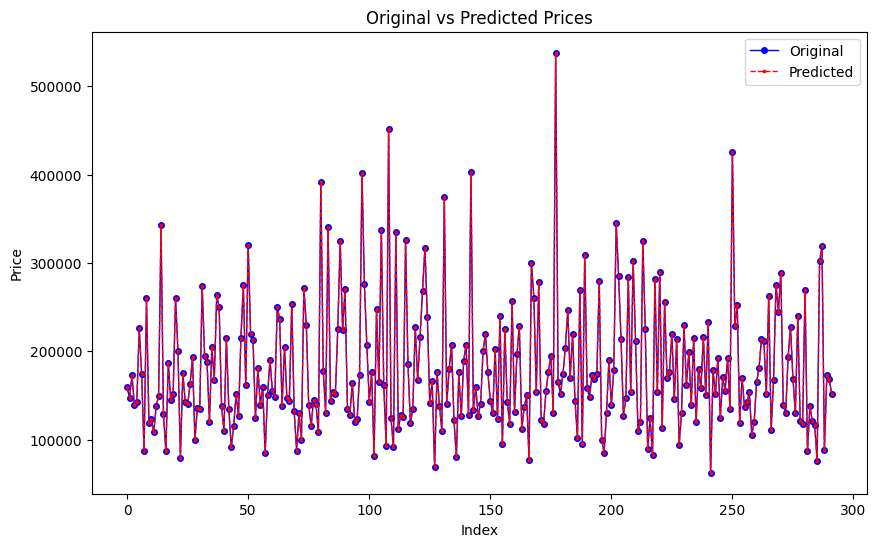

In [56]:
sort_indices = np.argsort(Y_cv)

#plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(Y_cv)), Y_cv, label='Original', linestyle='-', linewidth=1, color='blue', marker='o', markersize=4)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted', linestyle='--', linewidth=1, color='red', marker='s', markersize=2)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()


## Submission  

Finally, we use the **most performant model (XGBoost Regressor)** to make predictions on the competition test dataset and prepare the submission file.  


In [110]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['id'] = testing_data.index
final['SalePrice'] = pred

#Write Data frame to a csv file without index
final.to_csv('output.csv', index=False)